<a href="https://www.kaggle.com/code/sharafmukhtar/spaceship-titanic-science-solutions?scriptVersionId=92746026" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Spaceship Titanic Science Solutions
[Notebook used 
](https://www.kaggle.com/code/startupsci/titanic-data-science-solutions)  thanks to @[Manav Sehgal](https://www.kaggle.com/startupsci)
# Workflow stages

The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

- We may combine mulitple workflow stages. We may analyze by visualizing data.
- Perform a stage earlier than indicated. We may analyze data before and after wrangling.
- Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
- Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.


# Question and problem definition

Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system., competition is [described here at Kaggle](https://www.kaggle.com/competitions/spaceship-titanic).

> Knowing from a training set of samples listing passengers who Transported or did not the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset Transported or not.

We may also needs to develop some early understanding about the domain of our problem. This is described on the [Kaggle competition description page here](https://www.kaggle.com/competitions/spaceship-titanic). 

# Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying.** We may needs to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating.** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a [correlation](https://en.wikiversity.org/wiki/Correlation) among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting.** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting.** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating.** Can might create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting.** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
PATH = "/kaggle/input/spaceship-titanic/"
!ls {PATH}

sample_submission.csv  test.csv  train.csv


In [3]:
train_df = pd.read_csv(f'{PATH}train.csv', low_memory=False )
test_df = pd.read_csv(f'{PATH}test.csv', low_memory=False )

## Analyze by describing data

Pandas also helps describe the datasets answering following questions early in our project.

**Which features are available in the dataset?**

Noting the feature names for directly manipulating or analyzing these. These feature names are described on the [Kaggle data page here](https://www.kaggle.com/competitions/spaceship-titanic/data).

In [4]:
print(train_df.columns.values)

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']


**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

- Categorical: HomePlanet, CryoSleep, Cabin,Destination and VIP.

**Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- Continous: 'Age' 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck'.

In [5]:
# preview the data
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [6]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


**Which features contain blank, null or empty values?**

These will require correcting.

- Cabin  Embarked features contain a number of null values in that order for the training and test dataset.
- Age features contain a number of null values in that order for the training and test dataset. 
**What are the data types for various features?**

Helping us during converting goal.

- Seven features are object or string. Six are float. as shown below

In [7]:
round(train_df.isnull().sum()*100/len(train_df),2).sort_values(ascending=False)

CryoSleep       2.50
ShoppingMall    2.39
VIP             2.34
HomePlanet      2.31
Name            2.30
Cabin           2.29
VRDeck          2.16
FoodCourt       2.11
Spa             2.11
Destination     2.09
RoomService     2.08
Age             2.06
PassengerId     0.00
Transported     0.00
dtype: float64

In [8]:
round(test_df.isnull().sum()*100/len(test_df),2).sort_values(ascending=False)

FoodCourt       2.48
Spa             2.36
Cabin           2.34
ShoppingMall    2.29
Name            2.20
CryoSleep       2.17
VIP             2.17
Destination     2.15
Age             2.13
HomePlanet      2.03
RoomService     1.92
VRDeck          1.87
PassengerId     0.00
dtype: float64

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 437 or 50% of the actual number of passengers Transported while other 50% are not.
- Transported is a categorical feature with 0 or 1 values.
- 2% of passengers are VIP.
- 68% of passengers destination is TRAPPIST-1e 
- 55 of passengers destination is Cancri e
- 38 of Passengers within age range 38-75


In [9]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**What is the distribution of categorical features?**

- Destination variable as three possible values with 68% TRAPPIST-1e and 21% of 55 Cancri e and 11% for others.
- Cabin values have several dupicates across samples about (2132). Alternatively several passengers shared a cabin.


In [10]:
train_df.Cabin.duplicated().sum() ,

(2132,)

In [11]:
train_df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [12]:
train_df.nunique().sort_values(ascending=False)

PassengerId     8693
Name            8473
Cabin           6560
FoodCourt       1507
Spa             1327
VRDeck          1306
RoomService     1273
ShoppingMall    1115
Age               80
HomePlanet         3
Destination        3
CryoSleep          2
VIP                2
Transported        2
dtype: int64

# Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**

We want to know how well does each feature correlate with Transported. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing.**

1. We may need to complete Age feature as it is definitely correlated to Transported.
2. We may need to complete the Cabin feature as it may also correlate with Transported or another important feature.

**Correcting.**

1. We will handel null valuese over all featuers.
2. we will drop PassengerId and Name featuers.
3. we will split Cabin featuer to three valuese 'deck', 'num','side', then we will drop the orignal column.

**Creating.**

1. We may need to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.

1. The upper-class passengers (VIP=1) were more likely to have Transported. 

# Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical ( HomePlanet), CryoSleep, Cabin, Destination, VIP.

- **HomePlanet and Destination** We observe significant correlation (>0.65)  Transported (classifying #3). We decide to include this feature in our model.
- **CryoSleep** We observe significant correlation (>0.8) among CryoSleep=1 and Transported (classifying #3). We decide to include this feature in our model.
- **VIP** We confirm the observation during problem definition that VIP=false had very high Transported rate at 50% (classifying #1).
- **Cabin** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features, we can spilt it inot three other featuers 'deck', 'num','side' (creating #1).

Categorical: HomePlanet, CryoSleep, Cabin,Destination and VIP.

In [13]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [14]:
train_df[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [15]:
train_df[['Cabin', 'Transported']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Cabin,Transported
6559,T/3/P,1.0
2004,E/513/S,1.0
4581,G/1012/P,1.0
4580,G/1011/S,1.0
2008,E/516/P,1.0
...,...,...
4263,F/797/P,0.0
4264,F/797/S,0.0
2295,F/1077/P,0.0
2291,F/1075/P,0.0


In [16]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [17]:
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


# Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

### Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Transported).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

**Observations.**

- Age <=40 had high Transport rate.
- Oldest passengers (Age = 80) Transported.
- Large number of 20-25 year olds did not Transported.
- Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

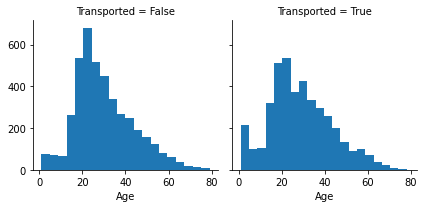

In [18]:
g = sns.FacetGrid(train_df[train_df['Age'] > 0], col='Transported')
g.map(plt.hist, 'Age', bins=20)

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations.**

- Destination=TRAPPIST-1e had most passengers, however most did not transported. Confirms our classifying assumption #2.
- Infant passengers in Destination=PSO J318.5-22 and Destination=55 Cancri e mostly transported. Further qualifies our classifying assumption #2.
- Most passengers in Destination=TRAPPIST-1e survived. Confirms our classifying assumption #3.
- Destination varies in terms of Age distribution of passengers.

**Decisions.**

- Consider Destination for model training.

Continous: 'Age' 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck'.

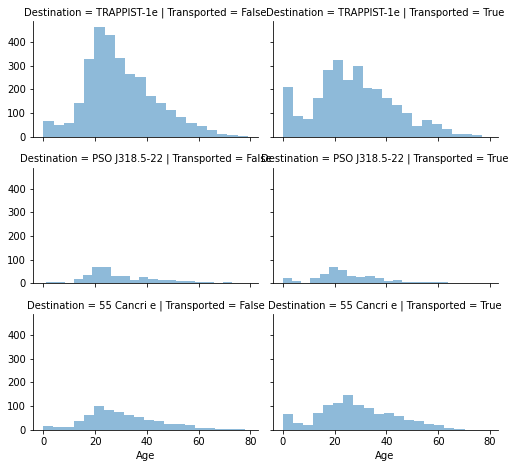

In [19]:
grid = sns.FacetGrid(train_df, col='Transported', row='Destination', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

**Observations.**

- Non VIP passengers had much better Transported rate than VIP. Confirms classifying (#1).
- VIP passengers had better Transported rate in CryoSleep=True when compared with CryoSleep=False. Completing (#2).
**Decisions.**

- Add VIP feature to model training.
- Complete and add CryoSleep feature to model training.

Categorical: HomePlanet, CryoSleep, Cabin,Destination and VIP.

In [20]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


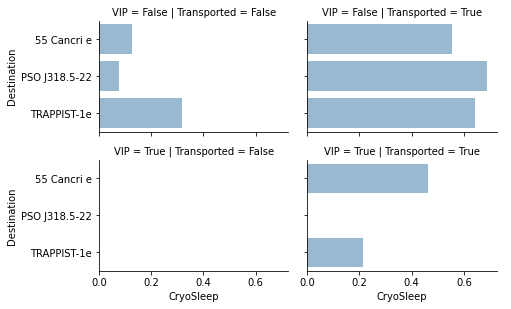

In [21]:
grid = sns.FacetGrid(train_df, row='VIP', col='Transported', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'CryoSleep', 'Destination', alpha=.5, ci=None)
grid.add_legend()

# Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

### Correcting by dropping features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Name (correcting #2) and PassengerId (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

Lets drop  the passengerid and Name from train and test data, (Correcting1,Correcting2)

In [22]:
train_df=train_df.drop(['PassengerId','Name'],axis=1)
test_df=test_df.drop(['PassengerId','Name'],axis=1)


### Creating new feature extracting from existing

In the following code we extract 'deck', 'num','side' from cabin feature using split method.then we will drop the the oreginal feature (creating #1)

In [23]:
train_df[['deck', 'num','side']] = train_df['Cabin'].str.split('/', expand=True)
train_df=train_df.drop(['Cabin'],axis=1)
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [24]:
test_df[['deck', 'num','side']] = test_df['Cabin'].str.split('/', expand=True)
test_df=test_df.drop(['Cabin'],axis=1)
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [25]:
train_df.nunique().sort_values(ascending=False)

num             1817
FoodCourt       1507
Spa             1327
VRDeck          1306
RoomService     1273
ShoppingMall    1115
Age               80
deck               8
HomePlanet         3
Destination        3
CryoSleep          2
VIP                2
Transported        2
side               2
dtype: int64

In [26]:
train_df['deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: deck, dtype: int64

In [27]:
train_df['deck'].unique().tolist()

['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T']


### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

We'll replace categories with their numeric codes, handle missing continuous values, and split the Cabin variable into a separate variable (creating #1).


In [28]:
train_df['deck']=train_df['deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
train_df['deck'].value_counts()

5.0    2794
6.0    2559
4.0     876
1.0     779
2.0     747
3.0     478
0.0     256
7.0       5
Name: deck, dtype: int64

In [29]:
test_df['deck']=test_df['deck'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7})
test_df['deck'].value_counts()

5.0    1445
6.0    1222
4.0     447
1.0     362
2.0     355
3.0     242
0.0      98
7.0       6
Name: deck, dtype: int64

In [30]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1.0,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5.0,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5.0,1,S


also, we need to convert side features to numerical values. let's see what unique values do we have?

In [31]:
train_df['side'].unique().tolist()

['P', 'S', nan]

In [32]:
train_df['side']=train_df['side'].replace({'P':0, 'S':1})
train_df['side'].value_counts()

1.0    4288
0.0    4206
Name: side, dtype: int64

In [33]:
test_df['side']=test_df['deck'].replace({'P':0, 'S':1})
test_df['side'].value_counts()

5.0    1445
6.0    1222
4.0     447
1.0     362
2.0     355
3.0     242
0.0      98
7.0       6
Name: side, dtype: int64

In [34]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1.0,0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5.0,0,1.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,0,1.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,0,1.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5.0,1,1.0


We need to convert HomePlanet features to numerical values. let's see what unique values do we have?

In [35]:
train_df['HomePlanet'].unique().tolist()

['Europa', 'Earth', 'Mars', nan]

In [36]:
train_df['HomePlanet']=train_df['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':1})
train_df['HomePlanet'].value_counts()

1.0    6361
0.0    2131
Name: HomePlanet, dtype: int64

In [37]:
test_df['HomePlanet']=test_df['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':1})
test_df['HomePlanet'].value_counts()

1.0    3188
0.0    1002
Name: HomePlanet, dtype: int64

We need to convert Destination features to numerical values. let's see what unique values do we have?

In [38]:
train_df['Destination'].unique().tolist()

['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan]

In [39]:
train_df['Destination']=train_df['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
train_df['Destination'].value_counts()

0.0    5915
2.0    1800
1.0     796
Name: Destination, dtype: int64

In [40]:
test_df['Destination']=test_df['Destination'].replace({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})
test_df['Destination'].value_counts()

0.0    2956
2.0     841
1.0     388
Name: Destination, dtype: int64

In [41]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,0.0,False,0.0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1.0,0,0.0
1,1.0,False,0.0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5.0,0,1.0
2,0.0,False,0.0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.0,0,1.0
3,0.0,False,0.0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.0,0,1.0
4,1.0,False,0.0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5.0,1,1.0


Lets convert CryoSleep & VIP feature to a column of integers 1 or 0.

In [42]:
train_df[['CryoSleep', 'VIP','Transported']] = (train_df[['CryoSleep', 'VIP','Transported']] == True).astype(int)
test_df[['CryoSleep', 'VIP']] = (test_df[['CryoSleep', 'VIP']] == True).astype(int)
train_df.tail()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
8688,0.0,0,2.0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0.0,98,0.0
8689,1.0,1,1.0,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6.0,1499,1.0
8690,1.0,0,0.0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6.0,1500,1.0
8691,0.0,0,2.0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4.0,608,1.0
8692,0.0,0,0.0,44.0,0,126.0,4688.0,0.0,0.0,12.0,1,4.0,608,1.0



# Completing a numerical continuous feature

Before we prepare the data for modeling, we need to deal with the missing data. We’ll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference. This is another area where you can extend on this tutorial.


In [43]:
nulls = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
ShoppingMall,208
HomePlanet,201
deck,199
num,199
side,199
VRDeck,188
FoodCourt,183
Spa,183
Destination,182


Before we prepare the data for modeling, we need to deal with the missing data. We’ll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference. This is another area where you can extend on this tutorial.

In [44]:
train_df = train_df.select_dtypes(include=[np.number]).interpolate().dropna()
test_df = test_df.select_dtypes(include=[np.number]).interpolate().dropna()

sum(train_df.isnull().sum() != 0)

0

# Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Transported or not) with other variables or features (Gender, CryoSleep, VIP...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [45]:
X_train = train_df.drop("Transported", axis=1)
Y_train = train_df["Transported"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((8693, 12), (8693,), (4277, 12))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [46]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


78.83

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).


In [47]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Destination,1.700634
11,side,0.810607
2,Age,0.227944
4,RoomService,0.003629
7,Spa,0.000659
6,ShoppingMall,0.000553
5,FoodCourt,-0.001226
8,VRDeck,-0.001534
9,Transported,-0.001542
3,VIP,-0.003908


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [48]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.56

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.25

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [50]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

70.87

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [51]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

62.21

In [52]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


67.45

In [53]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

71.06

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [54]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

95.16

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [55]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.16

train_df['deck'].unique().tolist()### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,95.16
8,Decision Tree,95.16
1,KNN,84.25
2,Logistic Regression,78.83
0,Support Vector Machines,78.56
6,Stochastic Gradient Decent,71.06
4,Naive Bayes,70.87
7,Linear SVC,67.45
5,Perceptron,62.21


In [57]:
sol=pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
sol['Transported']=Y_pred
sol.head()
sol.to_csv('submission1226.csv',index=False)

# Thank you, Looking forward to your comments and upvotes